Import packages - Pandas , Numpy

In [ ]:
import zipfile
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize,LabelEncoder,OneHotEncoder

Mounted at /content/drive/


# Extract Dataset

In [ ]:
zip = zipfile.ZipFile("/content/drive/MyDrive/kdd99/KDD.zip", 'r')
zip.extractall()
zip.close()

# Provide column names and save attacks broadly to 4 groups




In [ ]:
features = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack_types"]


R2L=['warezmaster.','warezclient.','spy.','phf.','multihop.','imap.','guess_passwd.','ftp_write.']
U2R=['rootkit.','perl.','loadmodule.','buffer_overflow.']
DoS=['smurf.','teardrop.','back.','land.','neptune.','pod.']
Probe=['ipsweep.','nmap.','portsweep.','satan.']

In [ ]:
# Original Code
training_data = pd.read_csv("/content/kddcup.data_10_percent",names=features)
training_data.shape

# Added by Santosh for testing
# training_data = pd.read_csv("/content/drive/MyDrive/kdd99/kddcup.data_10_percent.csv",names=features)
# training_data.shape

(494021, 42)

# Create class column to hold attack category of each record

In [ ]:
type_of_attack = []

def create_class(training_data):
  for record_attack in training_data['attack_types']:
    if record_attack in R2L:
      type_of_attack.append("R2L")
    elif record_attack in U2R:
      type_of_attack.append("U2R")
    elif record_attack == "normal.":
      type_of_attack.append("Normal")
    elif record_attack in DoS:
      type_of_attack.append("DoS")
    elif record_attack in Probe:
      type_of_attack.append("Probe")
  return type_of_attack
    
training_data["class"] = create_class(training_data)
training_data.head()



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,class
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,Normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,Normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,Normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,Normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,Normal


# Remove features which have single value throughout

In [ ]:
# Drops columns - num_outbound_cmds , is_host_login
for col in training_data.columns:
    if len(training_data[col].unique()) == 1:
        training_data.drop(col,inplace=True,axis=1)
training_data.shape

(494021, 41)

In [ ]:
training_data.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,class
494016,0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,Normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,Normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,Normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,Normal
494020,0,tcp,http,SF,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,35,0.00,0.00,0.0,0.0,1.0,0.0,0.14,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,Normal


# Remove duplicate records

In [ ]:
training_data.drop_duplicates(subset=None,keep='first',inplace=True)
training_data.shape

(145586, 41)

# Transforming Protocol_Type, Services, Flag to categorical variables

In [ ]:
training_data.protocol_type = training_data.protocol_type.astype('category').cat.codes
training_data.service = training_data.service.astype('category').cat.codes
training_data.flag = training_data.flag.astype('category').cat.codes
training_data.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,class
494016,0,1,22,9,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,Normal
494017,0,1,22,9,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,Normal
494018,0,1,22,9,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,Normal
494019,0,1,22,9,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,Normal
494020,0,1,22,9,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,35,0.00,0.00,0.0,0.0,1.0,0.0,0.14,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,Normal


In [ ]:
training_data['class'].value_counts()

Normal    87832
DoS       54572
Probe      2131
R2L         999
U2R          52
Name: class, dtype: int64

In [ ]:
training_data['attack_types'].value_counts()

normal.             87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: attack_types, dtype: int64

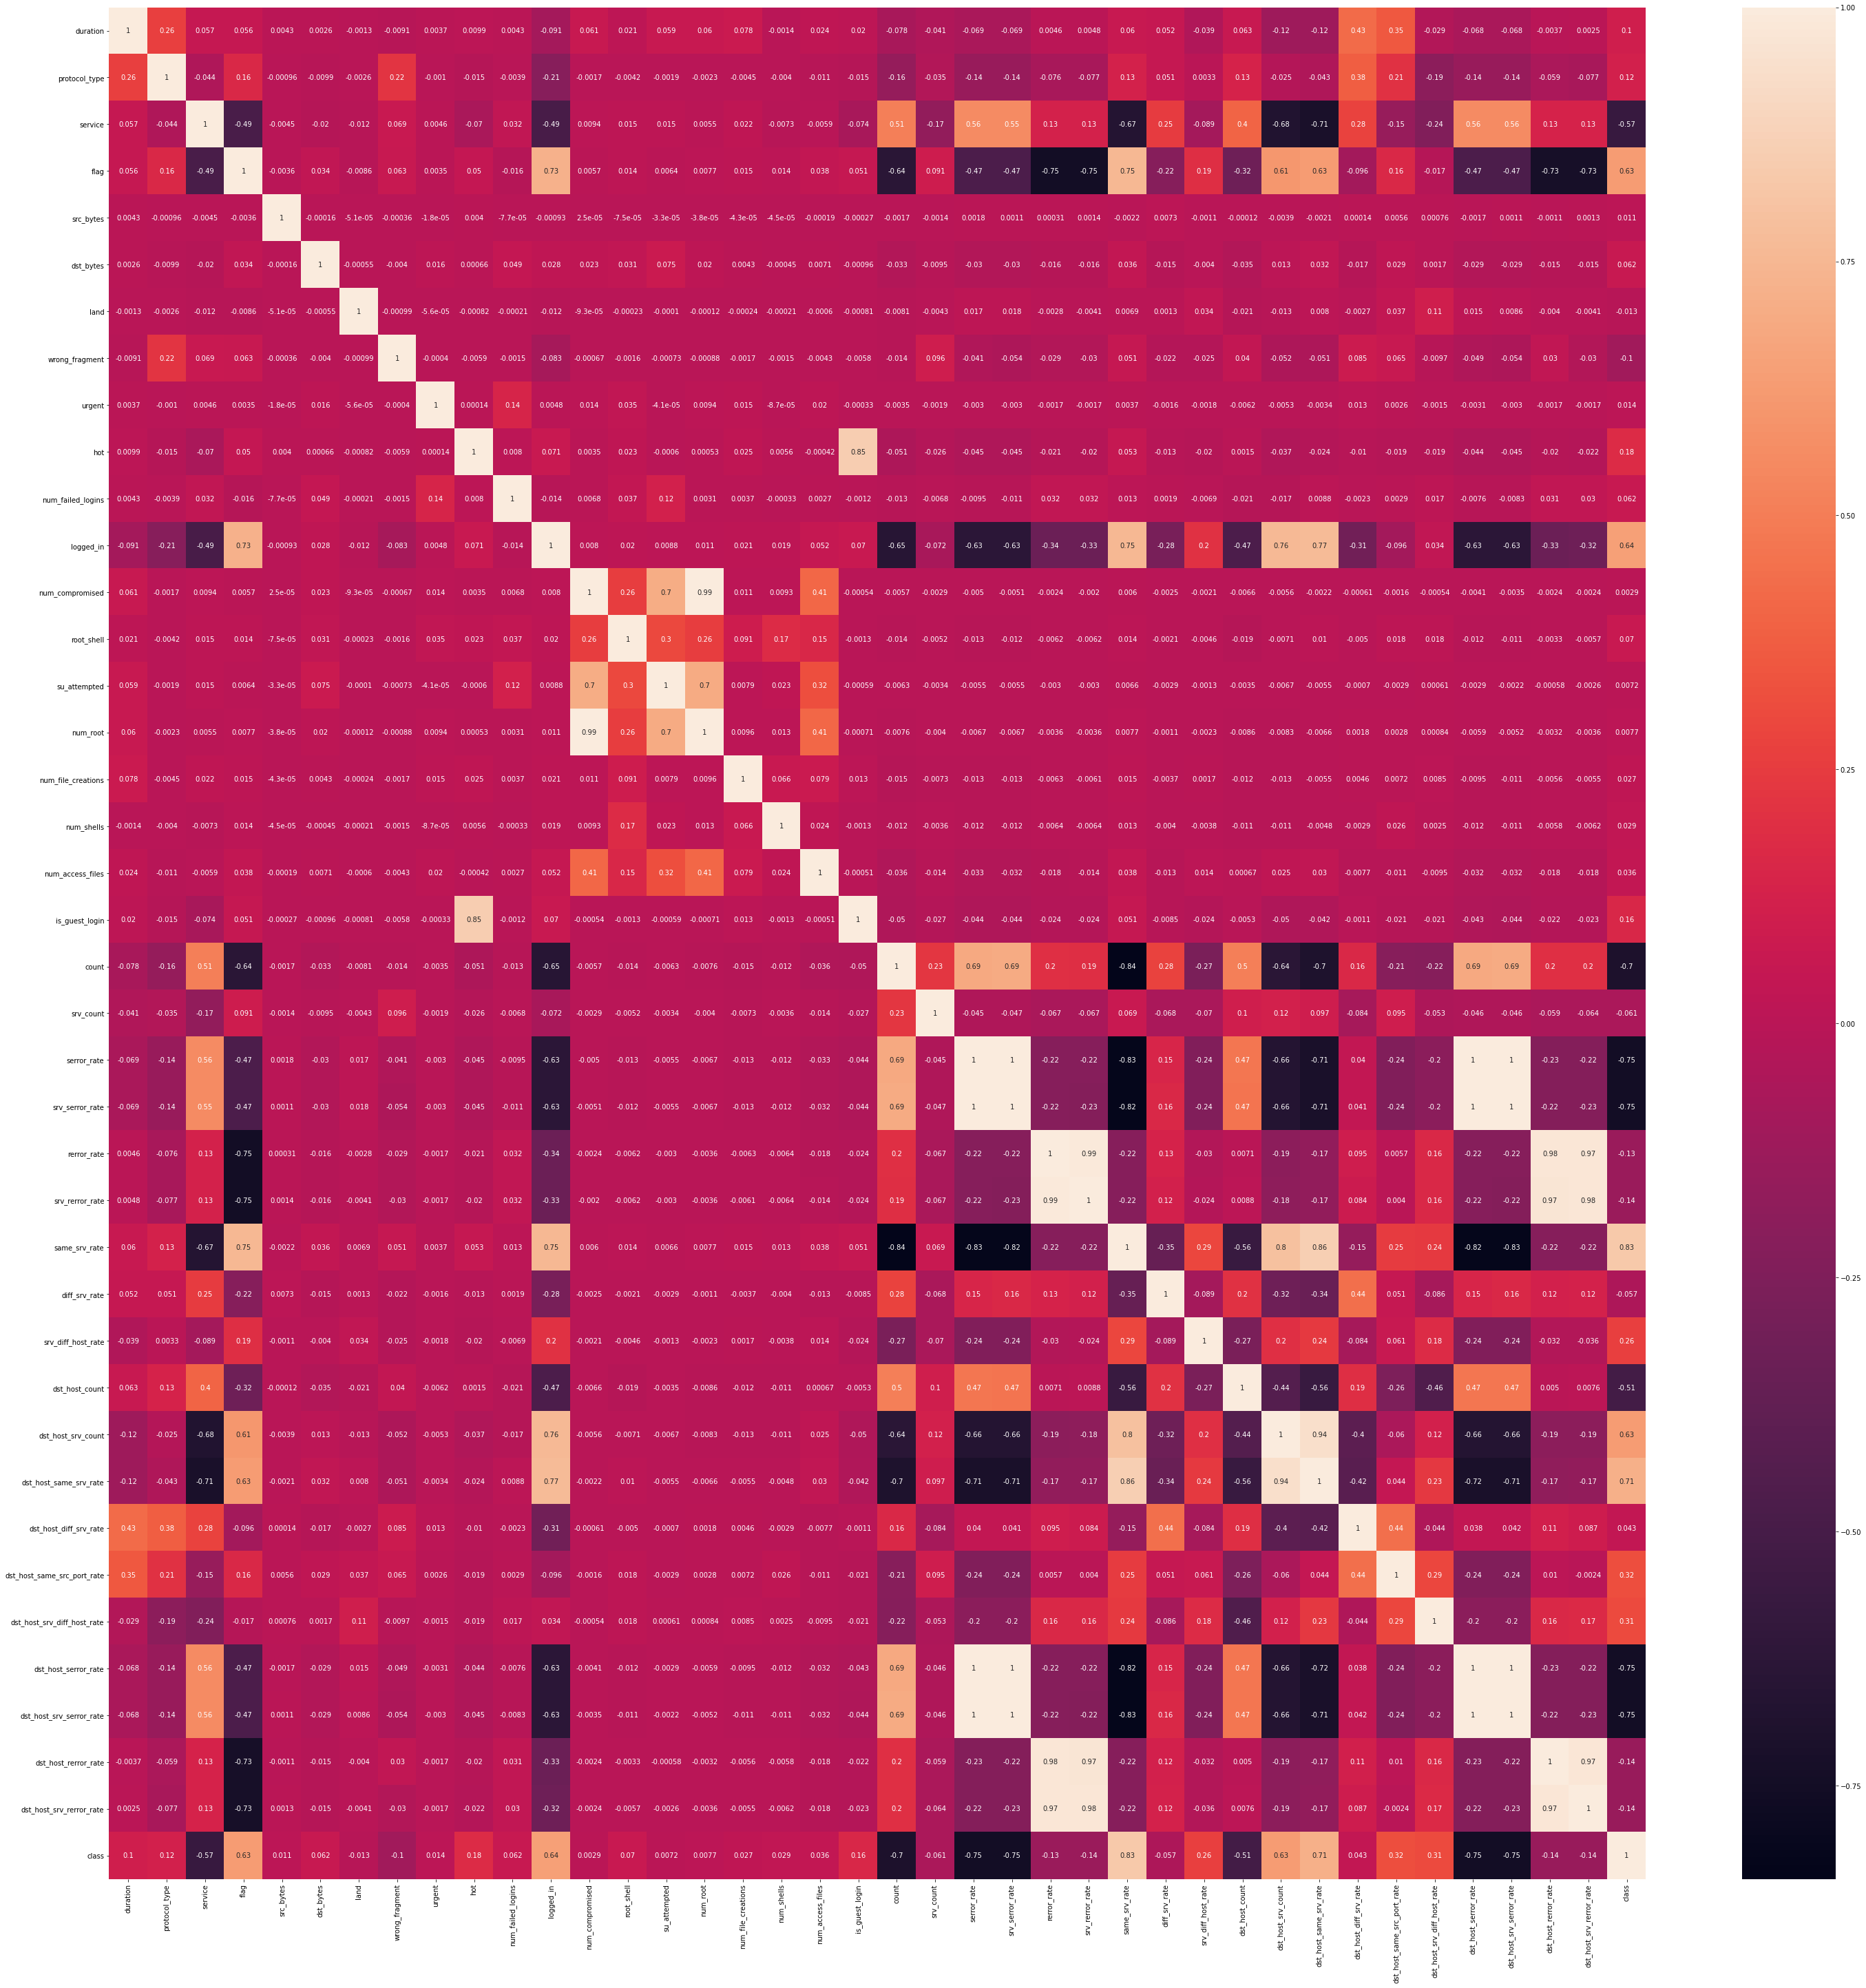

In [ ]:
training_data_copy = training_data.copy()
training_data_copy['class'] = training_data_copy['class'].astype('category').cat.codes
corr_matrix = training_data_copy.corr(method='pearson')
plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, annot = True)

In [ ]:
variable = ['duration', 'src_bytes', 'dst_bytes','land','wrong_fragment',
            'urgent','hot',	'num_failed_logins','num_compromised',	'root_shell',	'su_attempted',
            'num_root','num_file_creations','num_shells',	
            'num_access_files',	'is_guest_login','srv_count','rerror_rate',
            'srv_rerror_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_diff_srv_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate']



In [ ]:
for x in variable:
      del training_data[x]


In [ ]:
training_data.shape

(145586, 17)

In [ ]:
training_data = training_data.drop_duplicates(subset=None, keep='first',inplace=False)

In [ ]:
training_data.shape

(75303, 17)

In [ ]:
training_data.drop(columns="attack_types",inplace=True)
training_data.head()
# training_data['num_failed_logins'].unique()

,protocol_type,service,flag,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,class
0,1,22,9,1,8,0.0,0.0,1.0,9,9,1.0,0.11,0.0,0.0,0.0,Normal
1,1,22,9,1,8,0.0,0.0,1.0,19,19,1.0,0.05,0.0,0.0,0.0,Normal
2,1,22,9,1,8,0.0,0.0,1.0,29,29,1.0,0.03,0.0,0.0,0.0,Normal
3,1,22,9,1,6,0.0,0.0,1.0,39,39,1.0,0.03,0.0,0.0,0.0,Normal
4,1,22,9,1,6,0.0,0.0,1.0,49,49,1.0,0.02,0.0,0.0,0.0,Normal


In [ ]:
scaler = StandardScaler()
# extract numerical attributes and scale it to have zero mean and unit variance  
cols = training_data.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(training_data.select_dtypes(include=['float64','int64']))
# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_traindf.tail()

,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate
75298,1.078804,-0.694046,-0.636078,-0.634992,0.768579,-0.994921,1.342944,1.095671,-0.321016,0.327908,-0.638269,-0.610758
75299,1.078804,-0.674584,-0.636078,-0.634992,0.768579,-0.892165,1.342944,1.095671,-0.364180,0.327908,-0.638269,-0.610758
75300,1.078804,-0.674584,-0.636078,-0.634992,0.768579,-0.789410,1.342944,1.095671,-0.364180,0.327908,-0.638269,-0.610758
75301,1.078804,-0.655122,-0.257450,-0.390651,0.768579,-1.508698,1.342944,1.095671,-0.148363,0.327908,-0.504395,-0.610758
75302,1.078804,-0.655122,-0.636078,-0.634992,0.768579,-1.405942,1.342944,1.095671,-0.234690,0.327908,-0.549019,-0.610758


In [ ]:
def target_attribute(data):
  #data['label']= data['label'].value_counts().apply(np.log)  # log transformation
  target = data['class'] 
  return target

In [ ]:

y= target_attribute(training_data)
# print(y)

In [ ]:
y.shape

(75303,)

In [ ]:
def oneHotCode(target):
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(target)
  onehot_encoder = OneHotEncoder(sparse=False,categories='auto')
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  my_target = onehot_encoder.fit_transform(integer_encoded)
  target_vari = pd.DataFrame(my_target, columns =['Dos','Normal', 'Probe', 'R2L','U2R'] )
  return target_vari

In [ ]:
y =  oneHotCode(y)
y

,Dos,Normal,Probe,R2L,U2R
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
75298,0.0,1.0,0.0,0.0,0.0
75299,0.0,1.0,0.0,0.0,0.0
75300,0.0,1.0,0.0,0.0,0.0
75301,0.0,1.0,0.0,0.0,0.0


In [ ]:
X= sc_traindf
X

,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate
0,1.078804,-0.635660,-0.636078,-0.634992,0.768579,-1.580627,-0.977371,1.095671,0.067453,-0.354577,-0.638269,-0.632982
1,1.078804,-0.635660,-0.636078,-0.634992,0.768579,-1.477871,-0.883050,1.095671,-0.191527,-0.354577,-0.638269,-0.632982
2,1.078804,-0.635660,-0.636078,-0.634992,0.768579,-1.375116,-0.788728,1.095671,-0.277853,-0.354577,-0.638269,-0.632982
3,1.078804,-0.655122,-0.636078,-0.634992,0.768579,-1.272360,-0.694406,1.095671,-0.277853,-0.354577,-0.638269,-0.632982
4,1.078804,-0.655122,-0.636078,-0.634992,0.768579,-1.169605,-0.600084,1.095671,-0.321016,-0.354577,-0.638269,-0.632982
...,...,...,...,...,...,...,...,...,...,...,...,...
75298,1.078804,-0.694046,-0.636078,-0.634992,0.768579,-0.994921,1.342944,1.095671,-0.321016,0.327908,-0.638269,-0.610758
75299,1.078804,-0.674584,-0.636078,-0.634992,0.768579,-0.892165,1.342944,1.095671,-0.364180,0.327908,-0.638269,-0.610758
75300,1.078804,-0.674584,-0.636078,-0.634992,0.768579,-0.789410,1.342944,1.095671,-0.364180,0.327908,-0.638269,-0.610758
75301,1.078804,-0.655122,-0.257450,-0.390651,0.768579,-1.508698,1.342944,1.095671,-0.148363,0.327908,-0.504395,-0.610758


In [ ]:
columns_names = X.columns

# Test Data


In [ ]:
# Original Code
corrected_data = pd.read_csv("/content/corrected",names=features)

# Code added by Santosh for testing
# corrected_data = pd.read_csv("/content/drive/MyDrive/kdd99/corrected",names=features)

In [ ]:
corrected_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [ ]:
R2L=['warezmaster.','warezclient.','spy.','phf.','multihop.','imap.','guess_passwd.','ftp_write.','named.','sendmail.','snmpgetattack.',
    'worm.','xlock.','xsnoop.','httptunnel.']
U2R=['rootkit.','perl.','loadmodule.','buffer_overflow.','ps.','sqlattack.','xterm.']
DoS=['smurf.','teardrop.','back.','land.','neptune.','pod.','apache2.','mailbomd.','processtable.','udpstrom']
Probe=['ipsweep.','nmap.','portsweep.','satan.','mscan','saint']

In [ ]:
# corrected_data["class"] = create_class(corrected_data)
type_of_attack=[]
for i in corrected_data['attack_types']:
    if i == 'normal.':
        type_of_attack.append('Normal')
    elif i in R2L:
        type_of_attack.append('R2L')
    elif i in U2R:
        type_of_attack.append('U2R')
    elif i in DoS:
        type_of_attack.append('DoS')
    else:
        type_of_attack.append('Probe')
corrected_data["class"] = type_of_attack
      

In [ ]:
corrected_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,class
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L


In [ ]:
corrected_data.drop(columns=["num_outbound_cmds","is_host_login"],inplace=True)
corrected_data.shape

(311029, 41)

In [ ]:
corrected_data.drop_duplicates(subset=None,keep='first',inplace=True)
corrected_data.shape

(77291, 41)

In [ ]:
corrected_data.protocol_type = corrected_data.protocol_type.astype('category').cat.codes
corrected_data.service = corrected_data.service.astype('category').cat.codes
corrected_data.flag = corrected_data.flag.astype('category').cat.codes
corrected_data.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,class
310330,0,0,14,9,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,55,55,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
310354,0,0,14,9,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56,56,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
310404,0,2,46,9,105,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L
310667,0,0,14,9,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,67,67,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
310931,0,0,14,9,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,76,76,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal


In [ ]:
corrected_data['class'].value_counts()

Normal    47913
DoS       23258
Probe      3351
R2L        2699
U2R          70
Name: class, dtype: int64

In [ ]:
corrected_data['attack_types'].value_counts()

normal.             47913
neptune.            20332
guess_passwd.        1302
mscan.               1049
warezmaster.         1002
smurf.                936
satan.                860
apache2.              794
processtable.         744
back.                 386
saint.                364
snmpguess.            359
mailbomb.             308
snmpgetattack.        179
portsweep.            174
ipsweep.              155
httptunnel.           145
nmap.                  80
pod.                   45
buffer_overflow.       22
multihop.              18
named.                 17
ps.                    16
sendmail.              15
xterm.                 13
rootkit.               13
teardrop.              12
land.                   9
xlock.                  9
xsnoop.                 4
ftp_write.              3
phf.                    2
loadmodule.             2
worm.                   2
perl.                   2
sqlattack.              2
udpstorm.               2
imap.                   1
Name: attack

In [ ]:
resampled_data = corrected_data[columns_names]
resampled_data.shape,X.shape

((77291, 12), (75303, 12))

In [ ]:
corrected_label = corrected_data['class']

In [ ]:
resampled_data['class'] = corrected_label
resampled_data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(77291, 13)

# Remove duplicate from dataframe

In [ ]:
corrected_sample_data = resampled_data.drop_duplicates(subset=None, keep='first', inplace=False)

In [ ]:
corrected_sample_data.shape

(38833, 13)

# Split dataset into 6 parts

In [ ]:
def data_parts(Data, subset):
    split = len(Data) / float(subset)
    mydata = []
    last = 0.0

    while last < len(Data):
       mydata.append(Data[int(last):int(last + split)])
       last += split
    return mydata

In [ ]:
data1,data2,data3,data4,data5,data6,data7   =data_parts(corrected_sample_data, 7)

In [ ]:
data1.shape,data2.shape,data3.shape,data4.shape,data5.shape,data6.shape, data7.shape

((5547, 13),
 (5548, 13),
 (5547, 13),
 (5548, 13),
 (5547, 13),
 (5548, 13),
 (5548, 13))

# One Hot Encoder

In [ ]:
y1= target_attribute(data1)
y2= target_attribute(data2)
y3= target_attribute(data3)
y4= target_attribute(data4)
y5= target_attribute(data5)
y6= target_attribute(data6)
y7 = target_attribute(data7)

In [ ]:
y1_test =  oneHotCode(y1)
y2_test =  oneHotCode(y2)
y3_test =  oneHotCode(y3)
y4_test =  oneHotCode(y4)
y5_test =  oneHotCode(y5)
y6_test =  oneHotCode(y6)
y7_valid = oneHotCode(y7)

In [ ]:
y1_test.shape,y2_test.shape,y3_test.shape,y4_test.shape,y5_test.shape,y6_test.shape,y7_valid.shape

((5547, 5), (5548, 5), (5547, 5), (5548, 5), (5547, 5), (5548, 5), (5548, 5))

In [ ]:
scaler = StandardScaler()
# extract numerical attributes and scale it to have zero mean and unit variance  
cols = data1.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(data1.select_dtypes(include=['float64','int64']))
# turn the result back to a dataframe
x1_test = pd.DataFrame(sc_train, columns = cols)


In [ ]:
# extract numerical attributes and scale it to have zero mean and unit variance  
cols = data2.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(data2.select_dtypes(include=['float64','int64']))
# turn the result back to a dataframe
x2_test = pd.DataFrame(sc_train, columns = cols)


In [ ]:
# extract numerical attributes and scale it to have zero mean and unit variance  
cols = data3.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(data3.select_dtypes(include=['float64','int64']))
# turn the result back to a dataframe
x3_test = pd.DataFrame(sc_train, columns = cols)


In [ ]:
# extract numerical attributes and scale it to have zero mean and unit variance  
cols = data4.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(data4.select_dtypes(include=['float64','int64']))
# turn the result back to a dataframe
x4_test = pd.DataFrame(sc_train, columns = cols)


In [ ]:
# extract numerical attributes and scale it to have zero mean and unit variance  
cols = data5.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(data5.select_dtypes(include=['float64','int64']))
# turn the result back to a dataframe
x5_test = pd.DataFrame(sc_train, columns = cols)


In [ ]:
# extract numerical attributes and scale it to have zero mean and unit variance  
cols = data6.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(data6.select_dtypes(include=['float64','int64']))
# turn the result back to a dataframe
x6_test = pd.DataFrame(sc_train, columns = cols)


In [ ]:
# extract numerical attributes and scale it to have zero mean and unit variance  
cols = data7.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(data7.select_dtypes(include=['float64','int64']))
# turn the result back to a dataframe
x7_valid = pd.DataFrame(sc_train, columns = cols)


In [ ]:
x1_test.shape,x2_test.shape,x3_test.shape,x4_test.shape,x5_test.shape,x6_test.shape,x7_valid.shape

((5547, 12),
 (5548, 12),
 (5547, 12),
 (5548, 12),
 (5547, 12),
 (5548, 12),
 (5548, 12))

SVM Model


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

**train and predict**

In [ ]:
# train the svm model
def SVM_training(X_train,y_train,X_test,data_set,RBF,no):
  print("SVM " + str(no) +": " + "RBF = " + str(RBF) + ", predict on " + str(data_set))
  clf = OneVsRestClassifier(SVC(kernel ='rbf',C = RBF,gamma= 'auto'))
  # train the model
  train=clf.fit(X_train,y_train)
  # predict the target
  y_Pred= train.predict(X_test)
  pred =pd.DataFrame(y_Pred, columns =['Dos','Normal', 'Probe', 'R2L','U2R'])
  return pred

In [ ]:
#predict
# X --> sample
# y --> target
# 6 kinds of RBF parameter (5, 2, 1, 0.5, 0.2, 6)
pred1 = SVM_training(X,y,x1_test,data_set = 'data 1',RBF = 5,no =1)
pred2 = SVM_training(X,y,x2_test,data_set = 'data 2',RBF = 2,no =2)
pred3 = SVM_training(X,y,x3_test,data_set = 'data 3',RBF = 1,no =3)
pred4 = SVM_training(X,y,x4_test,data_set = 'data 4',RBF = 0.5,no =4)
pred5 = SVM_training(X,y,x5_test,data_set = 'data 5',RBF = 0.2,no =5)
pred6 = SVM_training(X,y,x6_test,data_set = 'data 6',RBF = 0.1,no =6)

SVM 1: RBF = 5, predict on data 1
SVM 2: RBF = 2, predict on data 2
SVM 3: RBF = 1, predict on data 3
SVM 4: RBF = 0.5, predict on data 4
SVM 5: RBF = 0.2, predict on data 5
SVM 6: RBF = 0.1, predict on data 6


**claculate the prediction accuracy**

In [ ]:
# accuracy
def SVM_accuracy(real, pred, data_set):
  score = []
  for i in pred:
    score.append(accuracy_score(real[i],pred[i]))
  accuracy = {'Dos':score[0]*100,'Normal':score[1]*100,'Probe':score[2]*100,
          'R2L':score[3]*100,'U2R':score[4]*100}
  return np.array(list(accuracy.values()))

In [ ]:
# calculate the average accuracy
accuracy1 =SVM_accuracy(y1_test, pred1, "data 1")
accuracy2 =SVM_accuracy(y2_test, pred2, "data 2")
accuracy3 =SVM_accuracy(y3_test, pred3, "data 3")
accuracy4 =SVM_accuracy(y4_test, pred4, "data 4")
accuracy5 =SVM_accuracy(y5_test, pred5, "data 5")
accuracy6 =SVM_accuracy(y6_test, pred6, "data 6")
avg = (accuracy1+accuracy2+accuracy3+accuracy4+accuracy5+accuracy6)/6
accuracy = [] 
for i in avg:
  accuracy.append(i)
res = {'Dos':accuracy[0],'Normal':accuracy[1],'Probe':accuracy[2],
      'R2L':accuracy[3],'U2R':accuracy[4]}
print(res)

{'Dos': 91.11022900284462, 'Normal': 85.19155927670067, 'Probe': 92.36619671872188, 'R2L': 94.6703796232644, 'U2R': 99.80472469058732}


------------------------------------------------------------------------------

**------------------>Importing and Using the KNN classifier<----------------**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def Knn_model(X_train, y_train, X_test, data_name = 'traing set',neighbors = 1,no =1):
  
  k_nn = KNeighborsClassifier(n_neighbors=neighbors, algorithm = 'auto', p=2, metric='euclidean')
  knn = OneVsRestClassifier(k_nn)
  train=knn.fit(X_train,y_train)

  yPred= train.predict(X_test)
  y_Pred =pd.DataFrame(yPred, columns =['Dos','Normal', 'Probe', 'R2L','U2R'])
  print("Knn_{} ,".format(no) +  str(data_name) + " , predict on the expert no {}".format(neighbors))

  print("Knn_{}  ".format(no)  +  " Train on the expert no {}".format(neighbors))
  return y_Pred

**------------->Using the training data to Train the KNN model<-------------**


In [ ]:
# predict1 = Knn_model(X_train, y_train, x1_test, data_name = 'Data1',neighbors = 1,no =1)
predict1 = Knn_model(X, y, x1_test, data_name = 'Data1',neighbors = 1,no =1)

Knn_1 ,Data1 , predict on the expert no 1
Knn_1   Train on the expert no 1


**------------->Using the other parts of the training data to Train the KNN model<-------------**

In [ ]:
predict2 = Knn_model(X, y, x2_test, data_name = 'Data2',neighbors = 3,no =2)
predict3 = Knn_model(X, y, x3_test, data_name = 'Data3',neighbors = 5,no =3)
predict4 = Knn_model(X, y, x4_test, data_name = 'Data4',neighbors = 7,no =4)
predict5 = Knn_model(X, y, x5_test, data_name = 'Data5',neighbors = 9,no =5)
predict6 = Knn_model(X, y, x6_test, data_name = 'Data6',neighbors = 11,no =6)

Knn_2 ,Data2 , predict on the expert no 3
Knn_2   Train on the expert no 3
Knn_3 ,Data3 , predict on the expert no 5
Knn_3   Train on the expert no 5
Knn_4 ,Data4 , predict on the expert no 7
Knn_4   Train on the expert no 7
Knn_5 ,Data5 , predict on the expert no 9
Knn_5   Train on the expert no 9
Knn_6 ,Data6 , predict on the expert no 11
Knn_6   Train on the expert no 11


**------------------>A function to calculate the accuracy of with respect to model and test data<------------------**

In [ ]:
def KNN_accuracy(test_data, prediction, dataset_name):
  score = list()
  for i in prediction:
    score.append(accuracy_score(test_data[i],prediction[i]))
  knn_accuracy = {'Dos':score[0]*100,'Normal':score[1]*100,'Probe':score[2]*100,
          'R2L':score[3]*100,'U2R':score[4]*100}
  return np.array(list(knn_accuracy.values()))

**----------------->Using the accuracy function for score prediction<-------------------**

In [ ]:
knn_pred_score1 = KNN_accuracy(y1_test, predict1, dataset_name = 'test set 1')
knn_pred_score2 = KNN_accuracy(y2_test, predict2, dataset_name = 'test set 2')
knn_pred_score3 = KNN_accuracy(y3_test, predict3, dataset_name = 'test set 3')
knn_pred_score4 = KNN_accuracy(y4_test, predict4, dataset_name = 'test set 4')
knn_pred_score5 = KNN_accuracy(y5_test, predict5, dataset_name = 'test set 5')
knn_pred_score6 = KNN_accuracy(y6_test, predict6, dataset_name = 'test set 6')

**-------------------->Grouping and finding the average KNN scores<------------------------**

In [ ]:
knn_avg_pred_score = (knn_pred_score1+knn_pred_score2+knn_pred_score3+knn_pred_score4+knn_pred_score5+knn_pred_score6)/6
knn_accuracy = [] 
for i in knn_avg_pred_score:
  knn_accuracy.append(i)
knn_res = {'Dos':knn_accuracy[0],'Normal':knn_accuracy[1],'Probe':knn_accuracy[2],
      'R2L':knn_accuracy[3],'U2R':knn_accuracy[4]}
print(knn_res)

{'Dos': 85.09255876255634, 'Normal': 86.29732813045428, 'Probe': 83.73171883691512, 'R2L': 93.6699043202812, 'U2R': 99.79871543633577}


**---------------->Performing the cross validation and determining the accuracy of the model<----------------**

In [ ]:
from sklearn.model_selection import cross_val_score
neighbors =[1,3,5,7,9,11]
myScore = []
for neighbour in neighbors:
  k_nn = KNeighborsClassifier(n_neighbors=neighbour, algorithm = 'auto', p=2, metric='euclidean')
  knn = OneVsRestClassifier(k_nn)
  score = cross_val_score(knn, x7_valid, y7_valid,cv =10 )
  myScore.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training example

In [ ]:
knn_accuracy = np.array(myScore).mean()
print("Knn model acuuracy: {}%". format(int(round(knn_accuracy*100))))

Knn model acuuracy: 95%


**-------------------->Creating the ensemble method<----------------------**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

In [ ]:
x_max = 10 * np.ones(5)
x_min = -1 * x_max
bounds = (x_min, x_max)

In [ ]:
! pip install pyswarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
%load_ext autoreload
%autoreload 2
options = {'c1': 0.8, 'c2': 0.6, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=x7_valid.shape[0],dimensions=x7_valid.shape[1], options=options)
cost, pos = optimizer.optimize(fx.sphere, iters=1000)

     |████████████████████████████████| 112kB 7.6MB/s 


2021-05-14 02:47:32,938 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.8, 'c2': 0.6, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=8.68e-39
2021-05-14 02:47:39,304 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8.684312159449237e-39, best pos: [ 1.67112317e-20  3.70880795e-21 -1.31095614e-20  7.30259222e-20
  1.00197133e-21  1.23731335e-20  1.00698900e-20  3.93064231e-20
 -2.11309869e-21  1.71466667e-20  1.79091302e-20 -2.16087818e-20]


In [ ]:
estimators = []
leng = [1,2,3,4,5,6]
for n,No in zip(([1,3,5,7,9,11]),leng):
  KNN = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=n, algorithm = 'auto', p=2, metric='euclidean'))
  estimators.append(("Knn_{} ,".format(No),KNN))

TypeError: ignored

In [ ]:
leng = [1,2,3,4,5,6]
for c,No in zip(([5,2,1,0.5,0.2,0.1]),leng):
  SVM = OneVsRestClassifier(SVC(kernel = 'rbf',C = c,gamma= 'auto',probability=True))
  estimators.append(("SVM_{} ,".format(No),SVM))

In [ ]:
weight=list(pos[0:12])
svm_knn =OneVsRestClassifier(VotingClassifier(estimators = estimators, voting='soft',weights=weight))
svm_knn = svm_knn.fit(X.values,y.values)
yPred=  svm_knn.predict(x1_test)

In [ ]:
yPred2=  svm_knn.predict(x2_test)
yPred3=  svm_knn.predict(x3_test)
yPred4=  svm_knn.predict(x4_test)
yPred5=  svm_knn.predict(x5_test)
yPred6=  svm_knn.predict(x6_test)

In [ ]:
def PSO_accuracy(test_data, prediction, dataset_name):
  score = list()
  for i in prediction:
    score.append(accuracy_score(test_data[i],prediction[i]))
  pso_accuracy = {'Dos':score[0]*100,'Normal':score[1]*100,'Probe':score[2]*100,
          'R2L':score[3]*100,'U2R':score[4]*100}
  return np.array(list(pso_accuracy.values()))

In [ ]:
pso_pred_score1 = prediction_score(y1_test.values, yPred1, data_name = 'test set 1')
pso_pred_score2 = prediction_score(y2_test.values, yPred2, data_name = 'test set 2')
pso_pred_score3 = prediction_score(y3_test.values, yPred3, data_name = 'test set 3')
pso_pred_score4 = prediction_score(y4_test.values, yPred4, data_name = 'test set 4')
pso_pred_score5 = prediction_score(y5_test.values, yPred5, data_name = 'test set 5')
pso_pred_score6 = prediction_score(y6_test.values, yPred6, data_name = 'test set 6')

In [ ]:
pso_avg_pred_score = (pso_pred_score1+pso_pred_score2+pso_pred_score3+pso_pred_score4+pso_pred_score5+pso_pred_score6)/6
pso_accuracy = [] 
for i in pso_avg_pred_score:
  pso_accuracy.append(i)
pso_res = {'Dos':pso_accuracy[0],'Normal':pso_accuracy[1],'Probe':pso_accuracy[2],
      'R2L':pso_accuracy[3],'U2R':pso_accuracy[4]}
print(pso_res)

{'Dos': 73.33333333333333, 'Normal': 76.66666666666667, 'Probe': 73.33333333333333, 'R2L': 73.33333333333333, 'U2R': 73.33333333333333}
